In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = pd.DataFrame(df)

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1, inplace = True)

In [6]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [7]:
df_target = df.Survived
inputs = df.drop("Survived",axis = 1 , inplace = True)

In [8]:
dummies = pd.get_dummies(df.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [9]:
pd.concat([df,dummies],axis=1)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [10]:
df

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [11]:
df.Age  = df.Age.fillna(df.Age.mean())
df

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df_target,test_size=0.2,random_state = 0)

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'female'

In [ ]:
model.score(X_test,y_test)

0.6927374301675978

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=3)

array([0.70168067, 0.64978903, 0.64978903])

In [80]:
model.predict_proba(X_test[:10])

array([[0.79572172, 0.20427828],
       [0.72458089, 0.27541911],
       [0.87748765, 0.12251235],
       [0.80115317, 0.19884683],
       [0.88756726, 0.11243274],
       [0.79627476, 0.20372524],
       [0.08291521, 0.91708479],
       [0.86537057, 0.13462943],
       [0.02178177, 0.97821823],
       [0.89457717, 0.10542283]])

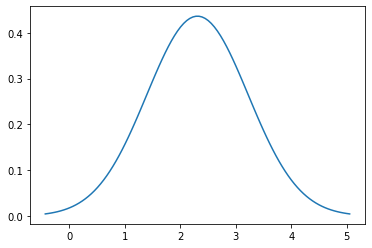

In [91]:
import math
import scipy.stats as stats

mu = df.Pclass.mean()
variance = df.Pclass.std()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [95]:
dft = df
dft = pd.concat([dft,df_target],axis =1 )

In [96]:
dft

,Pclass,Age,Fare,Survived
0,3,22.000000,7.2500,0
1,1,38.000000,71.2833,1
2,3,26.000000,7.9250,1
3,1,35.000000,53.1000,1
4,3,35.000000,8.0500,0
...,...,...,...,...
886,2,27.000000,13.0000,0
887,1,19.000000,30.0000,1
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [159]:
dftm = dft.groupby(['Survived']).Age.mean()
dfts = dft.groupby(['Survived']).Age.std()
print(dftm)
print(dfts)



Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64
Survived
0    12.457370
1    13.772498
Name: Age, dtype: float64


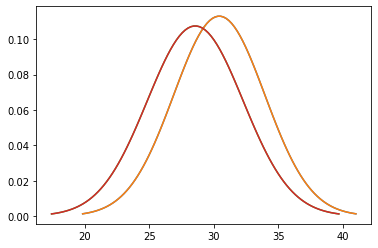

In [160]:
mu =  dftm[0]
variance =  dfts[0]

sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu1 =  dftm[1]
variance1 =  dfts[1]

sigma1 = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1)) 
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1))

plt.show()


In [165]:
y_pred =model.predict(X_test)

In [167]:

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred,)
conf_mat

array([[99, 13],
       [42, 25]], dtype=int64)

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


class FunctionInfo:
	
	def __init__(self):
		
		# Function information dictionary - { function name: [ list of arguments, return type, funtion description ] }
		
		self.func_dict =   {	
								'TKPY_NAIVE_BAYES_accuracy': [['float'], ['float'], ['Accuracy of the model']],
								'TKPY_NAIVE_BAYES_predprobabilities' : [['array'],['float'],['Prediciton probabilities for if a person survived or not']],
								'TKPY_NAIVE_BAYES_CrossVal' :[['float'],['array'],['Crossvalidation test for the training and testing model']],
								'TKPY_NAIVE_BAYES_pred': [['float'],['array'],['predicted values for any value']],
								'TKPY_NAIVE_BAYES_ConfusionMatrix' : [['float','float'],['matrix'],["confusion_matrix"]]
							}
	def get_func_dict(self):
		return self.func_dict



df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1, inplace = True)
df_target = df.Survived
inputs = df.drop("Survived",axis = 1 , inplace = True)
dummies = pd.get_dummies(df.Sex)
pd.concat([df,dummies],axis=1)
df.Age  = df.Age.fillna(df.Age.mean())
df.drop(["Sex"],axis = 1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df,df_target,test_size=0.3)
model = GaussianNB()
model.fit(X_train,y_train)

df

,Pclass,Age,Fare
0,3,22.000000,7.2500
1,1,38.000000,71.2833
2,3,26.000000,7.9250
3,1,35.000000,53.1000
4,3,35.000000,8.0500
...,...,...,...
886,2,27.000000,13.0000
887,1,19.000000,30.0000
888,3,29.699118,23.4500
889,1,26.000000,30.0000
